In [11]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [12]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data[:5]
# 넘파이 배열을 출력하면 5행,2개의 열로 정리되어 출력

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [13]:
fish_target = df.loc[cond, ['Species']]
fish_target

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
5,Bream
6,Bream
7,Bream
8,Bream
9,Bream


In [14]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [16]:
test_target

,Species
3,Bream
149,Smelt
20,Bream
26,Bream
152,Smelt
32,Bream
151,Smelt
150,Smelt
18,Bream
6,Bream


In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [18]:
kn.score(test_input, test_target['Species'])

1.0

In [19]:
kn.predict([[25, 150]])

C:\Users\1-16\Desktop\DAMF22\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

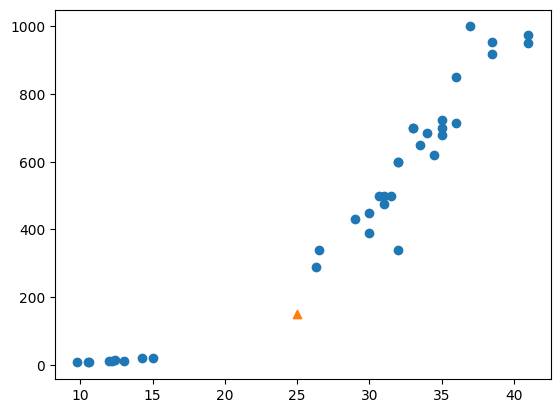

In [23]:
# 그래프(산점도) 만들기
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^') # 매개변수는 모양 지정

In [ ]:
# k- 최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용

In [22]:
kn.kneighbors([[25, 150]])

C:\Users\1-16\Desktop\DAMF22\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[130.48375378, 130.73859415, 137.17988191, 138.32150953,
         138.39320793]]),
 array([[ 2,  1, 13,  0, 29]]))

In [25]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     28.133333
Weight     481.872222
dtype: float64
Length2      9.918208
Weight     328.228942
dtype: float64


In [26]:
# 표준점수 변환(원본 - 평균) / 표준편차
train_scaled = (train_input - mean) / std

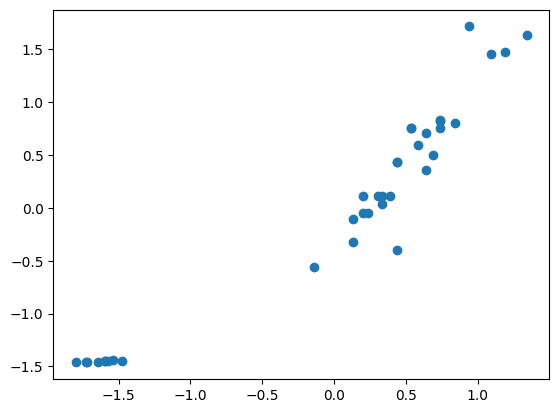

In [42]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [27]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [28]:
test_scaled = (test_input - mean) / std

In [29]:
kn.score(test_scaled, test_target)

1.0

In [30]:
new = ([25, 150] - mean) / std
new

Length2   -0.315917
Weight    -1.011100
dtype: float64

In [55]:
kn.predict([new])

C:\Users\1-00\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## Penguins
- Adelie, Gentoo 구분하기

In [1]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
df.dropna(inplace=True)

In [8]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond]
#pg_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [9]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
pg_data

,bill_depth_mm,body_mass_g
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0
...,...,...
338,13.7,4925.0
340,14.3,4850.0
341,15.7,5750.0
342,14.8,5200.0


In [ ]:
# 표준점수 만들기 
# mean = train_input.mean()
#std = train_input.std()

#train_scaled = (train_input - mean) / std